# Week 3 GRAPPA Seminar Assignment

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy

\begin{align}
\frac{dR}{dE_{r}} = \frac{R_{0}}{rE_{0}} e^{-E_{r}/rE_{0}}
\end{align}

Integrating this from the threshold energy to infinity gives 

\begin{align}
R = R_{0} e^{-E_{r}/rE_{0}}
\end{align}

where

\begin{align}
R_{0} = \frac{N_{A}}{A} \frac{\rho}{m_{\chi}} \sigma_{SI}(\chi + p) \frac{\mu^{2} A^{2}}{m_{p}^{2}} \langle v \rangle
\end{align}

and $\langle v \rangle$ is the average velocity. Rearranging the expression for R to give an expression for $\sigma_{SI}$ as a function of the WIMP particle mass gives

\begin{align}
\sigma_{SI}(\chi + p) = \frac{1}{\mathrm{factor}} R \frac{m_{\chi}}{\mu^{2}} e^{E_{r}/rE_{0}}
\end{align}

where the factor includes all the constants present in R$_{0}$. The value of $\sigma_{SI}(\chi + p)$ can be plotted as a function of the WIMP particle mass. These equations were taken from Particle Cosmology: DM Direct Detection notes from Auke-Pieter Colijn. 

### Define the units

In [2]:
# length
cm = 1
m = 1e2 * cm
km = 1e3 * m
pc = 3.1e18 * cm
Mpc = 1e6 * pc
kpc = 1e3 * pc

# time
s = 1
c = 3e5 * km/s

# mass/energy
GeV = 1
eV = 1e-9 * GeV
kg = 5.61e26 * GeV
M_solar = 2e30 * kg
g = 1e-3 * kg

# other quantities
m_p = 0.938 * GeV
v0 = 220 * km / s / c
N_A = 6.022e23
rho0 = 0.3 * GeV/cm**3

Define the constants necessary for the computations

In [3]:
# problem related quantities
# A = 131.293 * GeV
A = 131.293 * m_p
m_det = 500 * kg
T = 365*24*3600 * s
E_thresh = 3e3 * eV

m_N = A 

# factor_R0 = T * m_det * N_A * rho0 * A * v0 / m_p**2
# factor_R0 = T * m_det * rho0 * A * (2*v0/np.sqrt(np.pi)) / m_p**2     
factor_R0 = T * m_det * N_A * rho0 * A**2 * (2*v0/np.sqrt(np.pi)) / (A * g * m_p**2)

Define functions that return the reduced mass $\mu$, r, E$_{0}$ and the WIMP proton cross-section $\sigma_{SI}$.

In [4]:
def mu(m_x):
#     m_N = A/N_A * GeV/g
    return m_x*m_N / (m_x + m_N)

def r(m_x):
#     m_N = A/N_A * GeV/g
    return 4*m_x*m_N / (m_x + m_N)**2

def E0(m_x):
#     return 0.5*m_x*(2*v0/np.sqrt(np.pi))**2
    return 0.5*m_x*v0**2

def sigma_px(m_x):
    return m_x*c * max_events * np.exp(E_thresh / (r(m_x) * E0(m_x))) / (factor_R0 * mu(m_x)**2 * c**2)


For a WIMP particle with mass of 100 GeV and a confidence level of 95%, calculate the WIMP proton cross-section.

In [5]:
confidence = 95
m_x = 100 * GeV 

max_events = -np.log(1-confidence/100)

print(sigma_px(m_x)) 

1.112360394423267e-47


## Plot the WIMP proton cross-section as a function of the WIMP particle mass

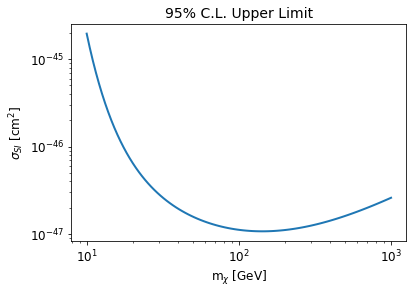

In [6]:
m_arr = np.logspace(1, 3, 100)

fig, ax = plt.subplots(1, 1, figsize=(6,4))
ax.plot(m_arr, sigma_px(m_arr), lw=2)
ax.set_xlabel(r'm$_{\chi}$ [GeV]', fontsize=12)
ax.set_ylabel(r'$\sigma_{SI}$ [cm$^{2}$]', fontsize=12)
ax.tick_params(axis='x', labelsize=12)
ax.tick_params(axis='y', labelsize=12)
ax.set_title(r'95% C.L. Upper Limit', fontsize=14)
ax.set_xscale('log')
ax.set_yscale('log')
plt.show()

## Part 2

In [7]:
# Recoil energy between 3 and 10 keV
# Mass of WIMP between 10 and 1000 GeV

m = np.logspace(1, 3, 20)
sigma_px = np.logspace(-47, -43, 20) 

# make a grid
X, Y = np.meshgrid(m, sigma_px)

# E_r_arr = np.logspace(-3, 1, 20)
x = 3e3*eV
y = 10e3*eV

# Calculating R - something is wrong here because R is way too small!! 
for E_r_arr in np.arange(x, y):
    expected = factor_R0 * sigma_px * mu(m)**2 * np.exp(-E_r_arr / r(m)*E0(m)) / m



In [12]:
# Example for chi_squared calculation
# n_events = 10
# expected = 8

def events(confidence): 
    return -np.log(1-confidence/100)

# confidence levels
HL = events(95)
LL = events(68)
    
def chi_square(n_events, n_expected):
    difference_sqr = n_events**2 - n_expected**2
    return (n_events - n_expected)**2 / difference_sqr

print(chi_square(10, HL), chi_square(5, LL))
    

0.5389667607033988 0.6288145680430258


TypeError: Input z must be a 2D array.

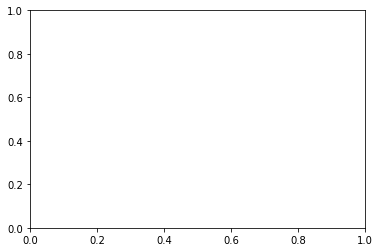

In [13]:
# Plot
fig, ax = plt.subplots(1, 1, figsize=(6,4))
CS = ax.contour(X, Y, chi_square(n_events, HL))